In [35]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
data = pd.read_csv("/content/drive/MyDrive/yelp.csv")

In [25]:
data.drop(['business_id','date','review_id','type','user_id','cool','useful','funny'], axis=1, inplace=True)

In [28]:
data.stars.astype(str)
data.stars.unique()

array([5, 4, 2, 3, 1])

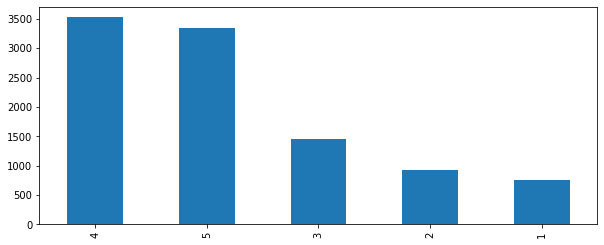

In [29]:
stars = ['5', '4', '3', '2', '1']
plt.figure(figsize=(10,4))
data.stars.value_counts().plot(kind='bar');

In [33]:
def print_plot(index):
    example = data[data.index == index][['text', 'stars']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Star:', example[1])

print_plot(20)

DVAP....

You have to go at least once in your life. It really is a neat place with alot of history. 

The service is great, it appears to be family run. 

The food is good. Better then Dennys but not as good as Mimi's. 

I had the all u can eat of beef ribs, lasagna, meat loaf, cat fish, chicken, mashed and diced potatoes, stuffing, rice, homemade apple pie, etc and salad bar. I know I am missing a bunch of stuff they had but you get the drift. 

They run specials on Prime rib and stuff so you might want to call to see what they are serving the night you go.
Star: 3


In [37]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
data['post'] = data['text'].apply(clean_text)
print_plot(20)

DVAP....

You have to go at least once in your life. It really is a neat place with alot of history. 

The service is great, it appears to be family run. 

The food is good. Better then Dennys but not as good as Mimi's. 

I had the all u can eat of beef ribs, lasagna, meat loaf, cat fish, chicken, mashed and diced potatoes, stuffing, rice, homemade apple pie, etc and salad bar. I know I am missing a bunch of stuff they had but you get the drift. 

They run specials on Prime rib and stuff so you might want to call to see what they are serving the night you go.
Star: 3
